1. Apply K-Means Clustering (elbow method to determine K).

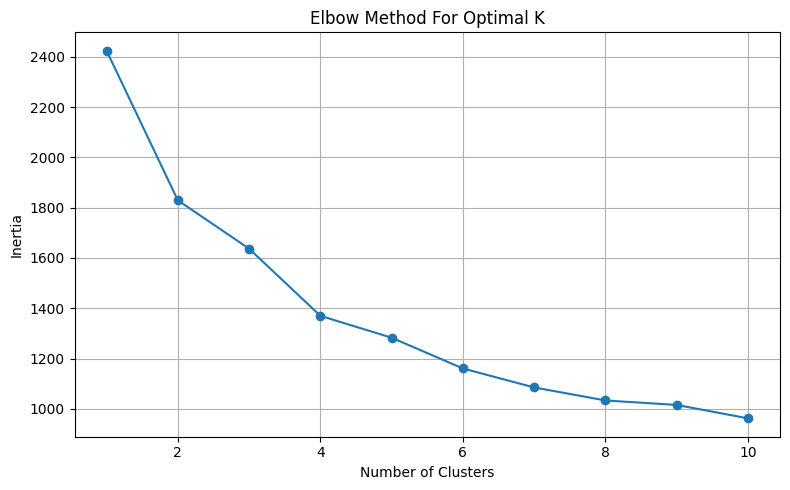

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../data/X_reduced_with_target.csv")

X_clustering = df.drop("target", axis=1)

inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_clustering)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method For Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.tight_layout()
plt.show()

2. Perform Hierarchical Clustering (dendrogram analysis).

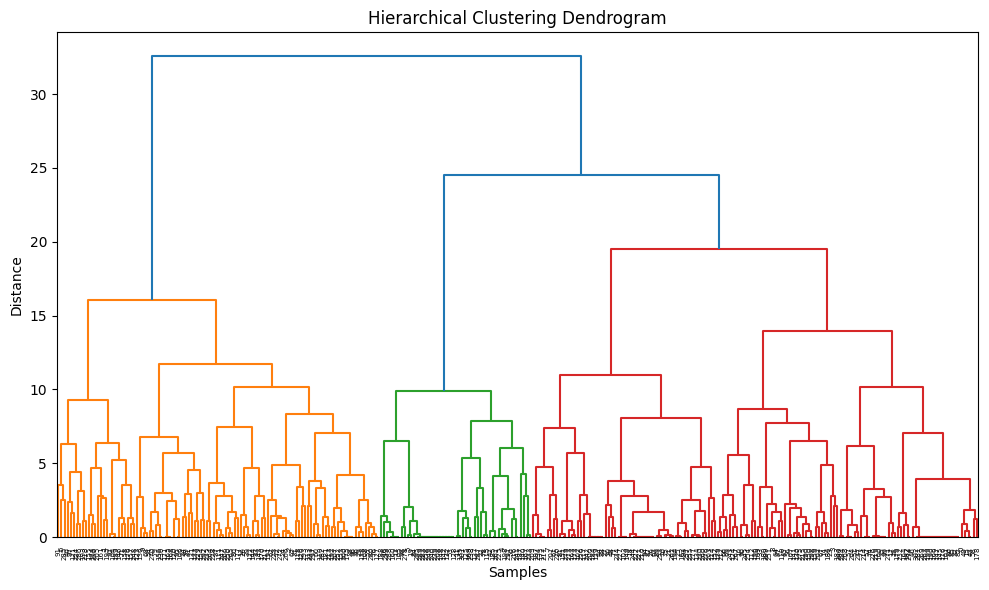

In [20]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

3. Compare clusters with actual disease labels.

In [ ]:
from sklearn.metrics import adjusted_rand_score

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_clustering)

df_with_target = pd.read_csv("../data/X_reduced_with_target.csv")
true_labels = df_with_target["target"]

score = adjusted_rand_score(true_labels, clusters)
print("Adjusted Rand Index (ARI):", score)

with open("../results/evaluation_metrics_unsupervised.txt", "w") as f:
    f.write("Unsupervised Learning - Clustering:\n")
    f.write(f"Adjusted Rand Index (ARI): {score:.4f}")

Adjusted Rand Index (ARI): 0.43820626112886857
